# Project: Investigate TMDB Movie Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen TMDB movie data set for this project. <br>
This data set contains information about 10,000 movies collected from The Movie Database (TMDb). <br>

**Independent variables thet will be explored**:<br>
- Budget  (How the budget changes over years)  <br>
- Revenue (How the revenue changes over years) <br>
- Runtime (What is the average runtime of movies) <br>

**Dependent variables thet will be explored**:<br>
- Budget and popularity, revenue and popularity, runtime and popularity <br>

In [1]:
# import statements for all of the packages that will be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the data
df = pd.read_csv('tmdb-movies.csv')

I will use the following helpful methods for **assessing and building** intuition about a dataset.

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#the dimensions of the dataframe
df.shape

(10866, 21)

This data set consists of 10866 rows and 21 columns

In [5]:
#the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#concise summary of the dataframe, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

As shown above, the columns with null values are: imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.

In [7]:
#the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#check for duplicates in the data
sum(df.duplicated())

1

In [9]:
#descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Dropping unnecessary columns, Handling null values and Dropping Duplicates)

#### a. Dropping Unnecessary Columns: 

In [3]:
#Drop unnecessary columns 
df=df.drop(['id','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj'],1)
#Confirm if drop was successful
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


#### b. Handling Null Values: 

Budget, revenue and runtime are numeric values, and they have some rows with 0. We will replace all 0 with NaN and then removing rows that contains NaN.

In [4]:
columns=['budget', 'revenue', 'runtime']

df[columns] = df[columns].replace(0, np.NAN)

df.dropna(subset=columns, inplace = True)

For the production companies, we will choose only rows that are not null

In [5]:
df=df[pd.notnull(df['production_companies'])]

If we check the shape again, we will find that the number of rows are decreased since we have deleted null rows

In [6]:
df.shape

(3809, 12)

#### c.Dropping Duplicate

In [7]:
sum(df.duplicated())

1

There is a duplicated value as we checked above, we will drop this value.

In [8]:
df.drop_duplicates(inplace=True)
#confirm dropping duplicates
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How the budget changes over years)

#### 1.1 Single Variable Exploration (Budget):

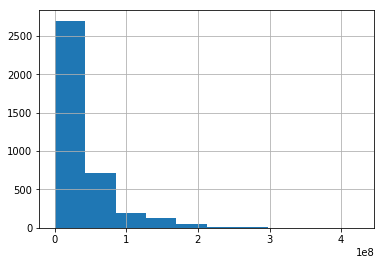

In [19]:
df.budget.hist()

The above histogram shows the distribution of budget, it is right skewed. We will check how the average budget changes over years as below:

In [20]:
budget_over_years = df.groupby('release_year').budget.mean()
budget_over_years

release_year
1960    4.161390e+06
1961    3.863700e+06
1962    5.635714e+06
1963    1.018583e+07
1964    4.847880e+06
1965    1.176000e+07
1966    6.453600e+06
1967    7.346154e+06
1968    5.994444e+06
1969    5.711022e+06
1970    8.718359e+06
1971    3.077077e+06
1972    2.958032e+06
1973    4.777250e+06
1974    5.352692e+06
1975    4.122222e+06
1976    8.033333e+06
1977    7.307895e+06
1978    9.774707e+06
1979    1.441875e+07
1980    1.391522e+07
1981    9.725000e+06
1982    1.322692e+07
1983    1.565248e+07
1984    1.364398e+07
1985    1.454331e+07
1986    1.317234e+07
1987    1.323761e+07
1988    1.448750e+07
1989    1.898018e+07
1990    2.300252e+07
1991    2.630000e+07
1992    2.289293e+07
1993    2.223174e+07
1994    2.966897e+07
1995    3.273949e+07
1996    3.531821e+07
1997    4.475874e+07
1998    4.383900e+07
1999    4.239461e+07
2000    4.638654e+07
2001    4.419770e+07
2002    4.284000e+07
2003    4.591601e+07
2004    4.681161e+07
2005    4.273551e+07
2006    4.106677e+07


Text(0.5,1,'Budget Over Years')

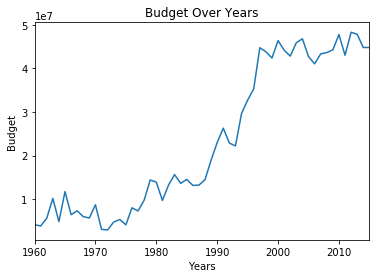

In [21]:
budget_over_years.plot()
plt.xlabel("Years")
plt.ylabel("Budget")
plt.title("Budget Over Years")

**Observation on Budget**:<br>The average budget of movies increased over years

#### 1.2 Multiple Variable Exploration (Budget and Popurality of Production Companies):

We will analyze mean popularity and mean budget of the production companies

In [33]:
buduget_popularity_df = df.groupby('production_companies')['budget','popularity'].mean()
buduget_popularity_df

,budget,popularity
production_companies,,
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions,4.500000e+06,0.385851
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,1.000000e+00,0.520430
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III,9.000000e+07,2.032753
1492 Pictures|Warner Bros.|Heyday Films,1.250000e+08,8.021423
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG,1.000000e+08,6.012584
1492 Pictures|Warner Bros.|Heyday Films|P of A Productions Limited,1.300000e+08,5.827781
1818|Lone Wolf McQuade Associates|Topkick Productions,5.000000e+06,0.290596
20th Century Fox,4.220000e+07,0.692946
20th Century Fox|1492 Pictures,7.500000e+07,0.263042


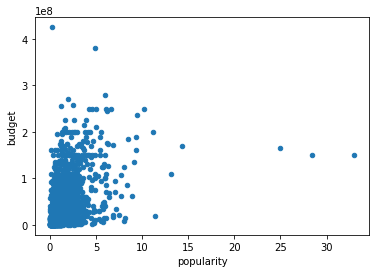

In [34]:
buduget_popularity_df.plot(x='popularity', y='budget', kind='scatter')

There is a positive correlation between the budget and popularity of the movies grouped under different production companies (the correlation is not highly significant, there are some values where budget of movie is high but still not popular). 

### Research Question 2  (How the revenue changes over years)

#### 2.1 Single Variable Exploration (Revenue):

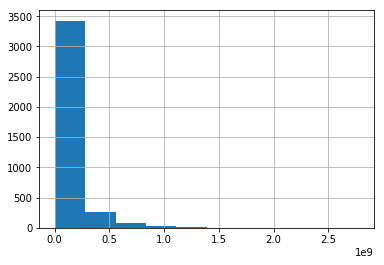

In [28]:
df.revenue.hist()

The above histogram shows the distribution of revenue, it is right skewed. We will check how the average revenue changes over year as below:

In [29]:
revenue_over_years = df.groupby('release_year').revenue.mean()
revenue_over_years

release_year
1960    2.580100e+07
1961    3.377202e+07
1962    2.947569e+07
1963    2.942115e+07
1964    4.694479e+07
1965    9.161637e+07
1966    1.694734e+07
1967    5.629497e+07
1968    2.469131e+07
1969    5.742677e+07
1970    4.999745e+07
1971    2.894513e+07
1972    6.011252e+07
1973    9.291776e+07
1974    5.539746e+07
1975    9.392303e+07
1976    4.999510e+07
1977    9.906097e+07
1978    6.889824e+07
1979    7.381438e+07
1980    5.748329e+07
1981    5.373338e+07
1982    8.290986e+07
1983    6.420325e+07
1984    5.729726e+07
1985    5.519938e+07
1986    4.871795e+07
1987    5.994515e+07
1988    5.582656e+07
1989    8.964569e+07
1990    8.937993e+07
1991    8.726243e+07
1992    9.596928e+07
1993    8.578492e+07
1994    1.068662e+08
1995    1.040435e+08
1996    9.180582e+07
1997    1.156503e+08
1998    1.024211e+08
1999    9.785331e+07
2000    1.049005e+08
2001    1.118475e+08
2002    1.141513e+08
2003    1.219669e+08
2004    1.160043e+08
2005    1.011370e+08
2006    9.297332e+07


Text(0.5,1,'Revenue Over Years')

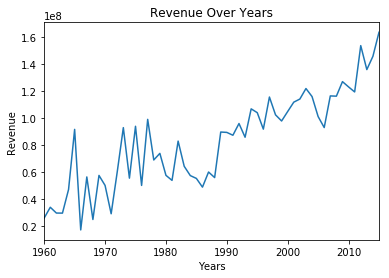

In [30]:
revenue_over_years.plot()
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue Over Years")

We can plot the average revenue of the 10 last years for better visualization.

Text(0.5,1,'Revenue Over Years')

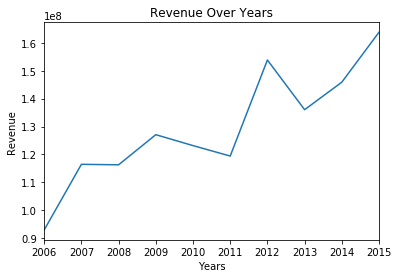

In [31]:
revenue_over_years.tail(10).plot()
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue Over Years")

**Observation on Revenue**:<br>The average revenue of movies increased over years but trend dropped approximately at 2011 and 2013

#### 2.2 Multiple Variable Exploration (Revenue and Popurality of Production Companies):

In [35]:
revenue_popularity_df = df.groupby('production_companies')['revenue','popularity'].mean()
revenue_popularity_df

,revenue,popularity
production_companies,,
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions,1.238200e+05,0.385851
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,1.378000e+03,0.520430
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III,1.745788e+08,2.032753
1492 Pictures|Warner Bros.|Heyday Films,9.764756e+08,8.021423
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG,8.766885e+08,6.012584
1492 Pictures|Warner Bros.|Heyday Films|P of A Productions Limited,7.898046e+08,5.827781
1818|Lone Wolf McQuade Associates|Topkick Productions,1.223263e+07,0.290596
20th Century Fox,8.819377e+07,0.692946
20th Century Fox|1492 Pictures,5.409517e+06,0.263042


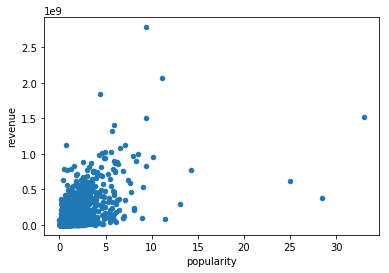

In [36]:
revenue_popularity_df.plot(x='popularity', y='revenue', kind='scatter')

As shown above, there is a positive correlation of popularity with revenue but not very significant.

### Research Question 3  (What is the average runtime of movies)

In [10]:
average_runtime = df['runtime'].mean()
print ("Average runtime of movies =",round(average_runtime,2),'minutes')

Average runtime of movies = 109.36 minutes


#### 3.1 Single Variable Exploration (Runtime):

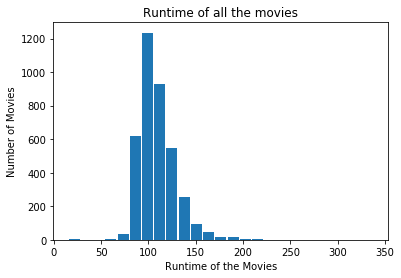

In [15]:
plt.hist(df['runtime'], rwidth = 0.9, bins =25)

plt.xlabel('Runtime of the Movies')

plt.ylabel('Number of Movies')

plt.title('Runtime of all the movies')

plt.show()

As shown in the above histogram, most of the movies have a runtime between 80 to 120 minutes

In [16]:
df.runtime.describe()

count    3808.000000
mean      109.362395
std        19.855757
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

**Observation on Runtime**:<br> 
25% of movies have runtime less than 96 minutes <br> 
50% of movies have runtime less than 106 minutes <br>
75% of movies have runtime less than 119 minutes

#### 3.2 Multiple Variable Exploration (10 release years with largest average runtime):

We will aggregate the movie runtimes and take the mean for each release year 

In [28]:
runtime_df = df.groupby('release_year')['runtime'].mean()
runtime_df

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
1965    167.600000
1966    132.200000
1967    118.384615
1968    130.777778
1969    127.500000
1970    121.454545
1971    112.615385
1972    113.000000
1973    111.916667
1974    122.000000
1975    119.333333
1976    118.333333
1977    108.789474
1978    122.882353
1979    115.437500
1980    113.304348
1981    105.133333
1982    112.653846
1983    107.677419
1984    108.619048
1985    104.658537
1986    105.127660
1987    103.304348
1988    104.642857
1989    106.705882
1990    108.923077
1991    109.720000
1992    112.830189
1993    111.236111
1994    109.770492
1995    112.341772
1996    110.035714
1997    114.722222
1998    111.355556
1999    109.043103
2000    109.432692
2001    109.483051
2002    106.960317
2003    107.966942
2004    107.105634
2005    109.886792
2006    108.267857
2007    107.750000
2008    108.209877
2009    107.264706
2010    106.734463
2011    106.581633

Text(0.5,1,'Average Runtime Over Years')

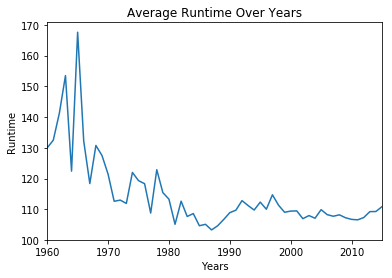

In [29]:
runtime_df.plot()
plt.xlabel("Years")
plt.ylabel("Runtime")
plt.title("Average Runtime Over Years")

The average runtime is decreasing over years. Now, we will see the 10 years with largest runtime 

In [30]:
runtime_df.nlargest(10)

release_year
1965    167.600000
1963    153.500000
1962    141.285714
1961    132.500000
1966    132.200000
1968    130.777778
1960    130.000000
1969    127.500000
1978    122.882353
1964    122.428571
Name: runtime, dtype: float64

It seems that decades of 1960 have the longest runtime of movies.

<a id='conclusions'></a>
## Conclusions

- The budget and revenue of movies are increasing over years <br>
- The analysis of relation between (budget and popularity),(revenue and popularity) were made by grouping the movies under production companies <br>
- Both of budget and revenue have a relation with popularity (but not very significant) <br>
- Most of the movies are timed between 80 minutes to 120 minutes. 

## Limitations

- We analyze budget, revenue and revenue columns were rows not zeros and this might have affected  our analysis. <br> 
- Applying descriptive statistics to draw a conclusion isn't enough, we need to apply inferential statistics in order to have a more meaningful insights

## Resources:

- Replace 0 with NAN: https://chrisalbon.com/python/data_wrangling/pandas_replace_values/
- Pandas documentation


In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0